<a href="https://colab.research.google.com/github/ardeeshany/Deep-Learning-Projects/blob/main/2022_04_DL_Keras_Img_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(224, 224, 3)

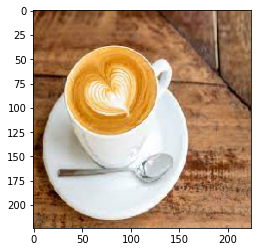

In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
myimg = image.load_img("/content/drive/MyDrive/Colab Notebooks/Images/coffee.jpeg", target_size=(224, 224))
plt.imshow(myimg);
myimg_array = image.img_to_array(myimg)
myimg_array.shape

In [2]:
import numpy as np
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
img2 = np.expand_dims(myimg_array, axis = 0) 
img2 = preprocess_input(img2)
img2.shape

(1, 224, 224, 3)

In [3]:
model = ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [7]:
preds = model.predict(img2)
decode_predictions(preds, top = 2)

[[('n07920052', 'espresso', 0.7477756), ('n07930864', 'cup', 0.07522464)]]

# Check Architecture

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

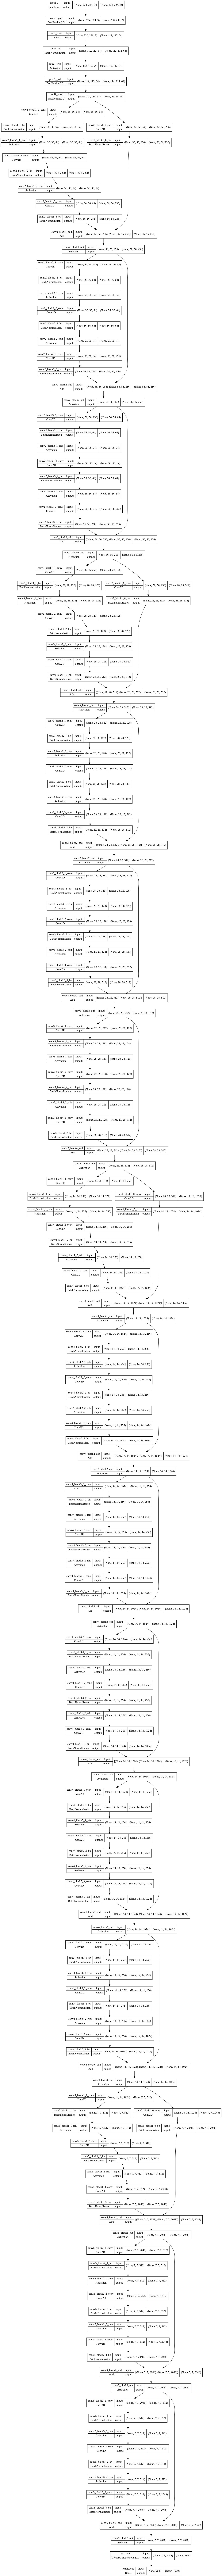

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Accessing intermediate layers

In [233]:
model.layers[:5]

In [ ]:
model.layers[2].get_config()

In [231]:
layer_names = [layer.name for layer in model.layers]
layer_names[:5]

['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu']

In [230]:
# makes the function that generate the outputs
layer_outputs = [layer.output for layer in model.layers]
layer_outputs[:5]

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 230, 230, 3) dtype=float32 (created by layer 'conv1_pad')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_conv')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_bn')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'conv1_relu')>]

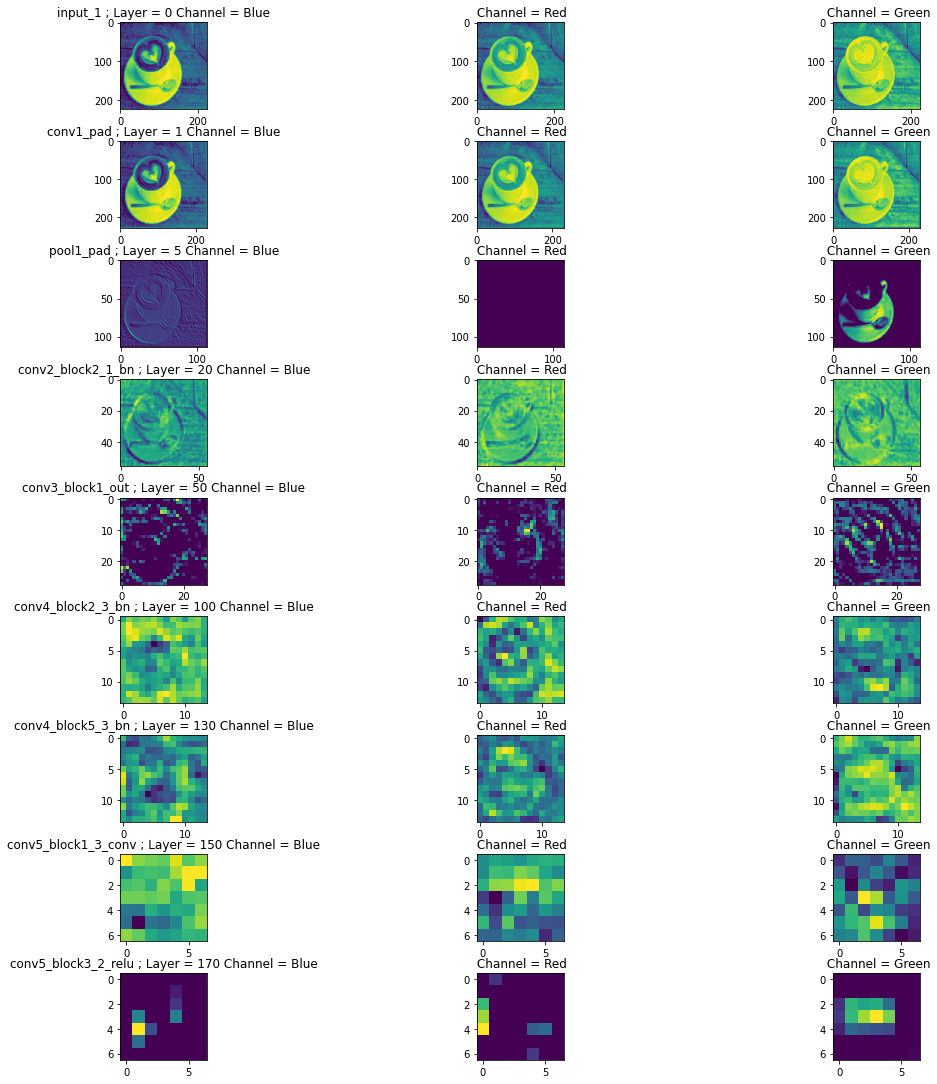

In [227]:
import tensorflow
visualize_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)
feature_maps = visualize_model.predict(img2)

lays = [0,1, 5, 20, 50, 100, 130, 150, 170]

fig, ax = plt.subplots(len(lays),3, figsize=(15,15))
fig.tight_layout()
for i, selected_lay in enumerate(lays) :
  ax[i, 0].set_title(layer_names[selected_lay] + " ; Layer = " + str(selected_lay) + " Channel = Blue")
  ax[i, 1].set_title(" Channel = Red")
  ax[i, 2].set_title(" Channel = Green")
  ax[i, 0].imshow(feature_maps[selected_lay][0,:,:,0], cmap = 'viridis'); # channel 0 = B
  ax[i, 1].imshow(feature_maps[selected_lay][0,:,:,1], cmap = 'viridis'); # channel 1 = R
  ax[i, 2].imshow(feature_maps[selected_lay][0,:,:,2], cmap = 'viridis'); # channel 2 = G